In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from glob import glob
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data_=glob('/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/NWCSAF_Yifan/*.tar')

In [4]:
data_=glob("/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/Sample/20191127/*.npy")
data_[12]

'/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/Sample/20191127/NWCSAF_regridded_PanAfrica_20191127T0300.npy'

In [38]:
crr_precip=np.load(data_[12],allow_pickle=True).filled().T
crr_precip[crr_precip<0]=0
crr_precip[np.isnan(crr_precip)]=0
crr_precip[crr_precip>100]=0

lon_grid=np.arange(-20,52,0.1)
lat_grid=np.arange(-35,38,0.1)
x, y = np.float32(np.meshgrid(lon_grid,lat_grid))

In [7]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 69.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 93.8 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102742 sha256=5a2259df81f82d1634625183a8ff24a7aa292d00fbdfd1cd3fcd31a1c793415d
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


###Check Result

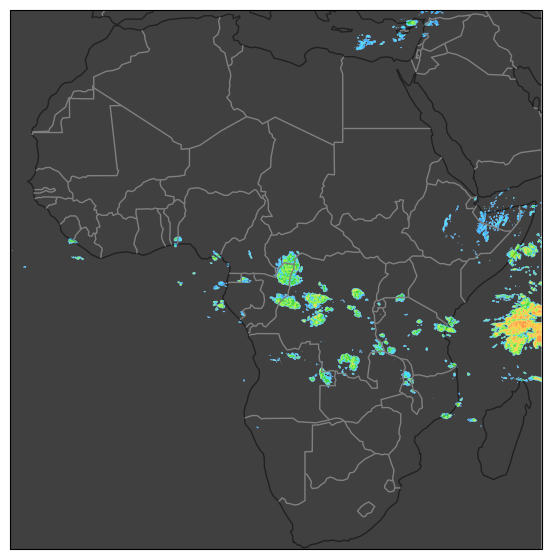

In [39]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import BoundaryNorm, ListedColormap

import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# Set the figure size, projection, and extent
fig = plt.figure(figsize=(21,7))
ax = plt.axes(projection=ccrs.PlateCarree())
crr_precip_temp=np.select(
    [crr_precip<0.2,crr_precip<1,crr_precip<2,crr_precip<3,crr_precip<5,crr_precip<7,crr_precip<10,crr_precip<15,crr_precip<20,crr_precip<30,crr_precip<50],
    [0,1,2,3,4,5,6,7,8,9,10],11)
cmap = ListedColormap(['black', '#1e1ed5','#0195ff', '#00d2fd',
        '#448822', '#03c602', '#6eef02','#fefe01',
        '#fdbf02','#fd7d02','#ff5000','#ab1822'])

plt.contourf(x, y, crr_precip_temp,cmap=cmap,transform=ccrs.PlateCarree(), alpha=.75, antialiased=True)
ax.add_feature(cfeature.BORDERS, edgecolor='grey', facecolor="none", linewidth=1)
ax.add_feature(cfeature.LAND, edgecolor='grey', facecolor="none", linewidth=1)
plt.show()

###Clip to West Africa Region

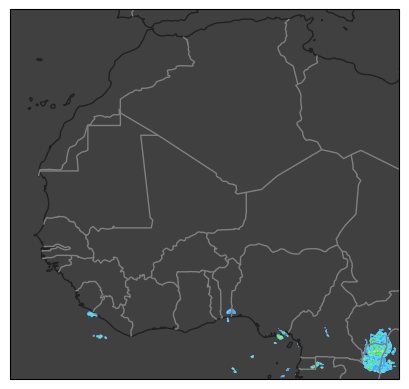

In [45]:
crr_t=crr_precip[350:,0:400]

lon_grid=np.arange(-20,20,0.1)
lat_grid=np.arange(0,38,0.1)
x, y = np.float32(np.meshgrid(lon_grid,lat_grid))

ax = plt.axes(projection=ccrs.PlateCarree())
crr_precip_temp=np.select(
    [crr_t<0.2,crr_t<1,crr_t<2,crr_t<3,crr_t<5,crr_t<7,crr_t<10,crr_t<15,crr_t<20,crr_t<30,crr_t<50],
    [0,1,2,3,4,5,6,7,8,9,10],11)
cmap = ListedColormap(['black', '#1e1ed5','#0195ff', '#00d2fd',
        '#448822', '#03c602', '#6eef02','#fefe01',
        '#fdbf02','#fd7d02','#ff5000','#ab1822'])

plt.contourf(x, y, crr_t,cmap=cmap,transform=ccrs.PlateCarree(), alpha=.75, antialiased=True)
ax.add_feature(cfeature.BORDERS, edgecolor='grey', facecolor="none", linewidth=1)
ax.add_feature(cfeature.LAND, edgecolor='grey', facecolor="none", linewidth=1)
plt.show()

###Quality Checking

In [48]:
data_=glob('/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/NWCSAF_Yifan/*.tar')

In [62]:
data_=[i for i in data_ if i.split('/')[-1].replace('.tar','')[:6] in ['202005','202006','202007','202008','202009']]

In [67]:
import subprocess
import shutil
from tqdm import tqdm
dict_={}
iter=0
for i in tqdm(data_):
  tarfile = i
  path = '/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/Sample/testing_quality'
  retcode = subprocess.call(['tar', '-xvf', tarfile, '-C', path])
  name_folder=i.split('/')[-1].replace('.tar','')
  day_={}
  data_2=glob(path+'/'+name_folder+'/*.npy')
  for j in data_2:
    times=j.split('/')[-1].split('_')[-1].replace('.npy','')
    crr_precip=np.load(j,allow_pickle=True).filled().T
    crr_precip[crr_precip<0]=0
    crr_precip[np.isnan(crr_precip)]=0
    crr_precip[crr_precip>100]=0
    crr_t=crr_precip[350:,0:400]
    if np.any(crr_t>=2):
      check=True
    else:
      check=False
    day_[times]=check
    open(j, 'w').close()
  shutil.rmtree(path+'/'+name_folder)
  dict_[name_folder]=day_

100%|██████████| 153/153 [45:14<00:00, 17.74s/it]


In [222]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
y_=pd.DataFrame(columns=['Date','Time','Rain'])
for i in dict_:
  for j in dict_[i]:
    t={'Date':[i],
       'Time':[j],
       'Rain':[dict_[i][j]]}
    t=pd.DataFrame.from_dict(t)
    y_=y_.append(t,ignore_index=True)

In [223]:
y_=y_.sort_values('Time').reset_index()
y_.to_pickle('/content/drive/MyDrive/Dissertation - Nowcasting/CodeRepository/Dissertation-Nowcasting/data/pd_check_rain2020.pickle')

In [224]:
y_.shape

(14157, 4)

In [232]:
from numpy.random import default_rng
def sample(y_,n_sample,n_sequence):
  n_=y_.shape[0]//n_sequence
  assert n_sample<n_
  rng = default_rng()
  numbers = rng.choice(n_, size=n_sample, replace=False)
  sequence=[]
  for i in numbers:
    start=i*n_sequence
    end=start+n_sequence
    t_list=y_.iloc[start:end].Time.tolist()
    sequence.append(t_list)
  return sequence

In [237]:
sample_list=sample(y_,1000,10)

In [238]:
data=pd.DataFrame()
data['Seq']=pd.Series(sample_list)

In [239]:
train_=np.round(data.shape[0]*0.6).astype(int)
valid_=np.round(data.shape[0]*0.8).astype(int)
data_train=data.iloc[0:train_]
data_valid=data.iloc[train_:valid_]
data_test=data.iloc[valid_:]

In [240]:
import pickle as pickle
file = open('/content/drive/MyDrive/Dissertation - Nowcasting/CodeRepository/Dissertation-Nowcasting/data/pd_train_valid_test_2020.pickle', 'wb')
pickle.dump([data_train,data_valid,data_test], file)
file.close()

In [247]:
import os
def clip_data_npy(y_,data_type='train'):
  tar_path='/content/drive/MyDrive/Dissertation - Nowcasting/Dissertation Project/Data/NWCSAF_Yifan/'

  time_=[]
  for i in y_.Seq.tolist():
    time_.extend(i)
  time_.sort()
  date_=list(set([i[:8] for i in time_]))
  for dt in tqdm(date_):
    tm=[j for j in time_ if j[:8]==dt]
    parent_path='/content/drive/MyDrive/Dissertation - Nowcasting/CodeRepository/Dissertation-Nowcasting/data/untar'
    path_=os.path.join(parent_path,'temp')
    os.makedirs(path_,exist_ok=True)
    tarfile=tar_path+dt+'.tar'
    retcode = subprocess.call(['tar', '-xvf', tarfile, '-C', parent_path+'/temp'])
    t_=glob(parent_path+'/temp/**/*.npy')
    for tm_c in tm:
      t_check=[l for l in t_ if l.split('_')[-1].replace('.npy','')==tm_c]
      crr_precip=np.load(t_check[0],allow_pickle=True).filled().T
      crr_precip[crr_precip<0]=0
      crr_precip[np.isnan(crr_precip)]=0
      crr_precip[crr_precip>100]=0
      crr_t=crr_precip[350:,0:400]
      with open('/content/drive/MyDrive/Dissertation - Nowcasting/CodeRepository/Dissertation-Nowcasting/data/'+data_type+'/'+tm_c+'.npy', 'wb') as f:
        np.save(f,crr_t)
    for k in t_:
      open(k, 'w').close()
    shutil.rmtree(parent_path+'/temp')

In [248]:
clip_data_npy(data_train)

100%|██████████| 149/149 [43:46<00:00, 17.63s/it]


In [249]:
clip_data_npy(data_test,data_type='test')

100%|██████████| 122/122 [34:28<00:00, 16.96s/it]


In [250]:
clip_data_npy(data_valid,data_type='valid')

100%|██████████| 119/119 [34:58<00:00, 17.63s/it]
